In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu

<Axes: xlabel='seasonal_year', ylabel='ppk'>

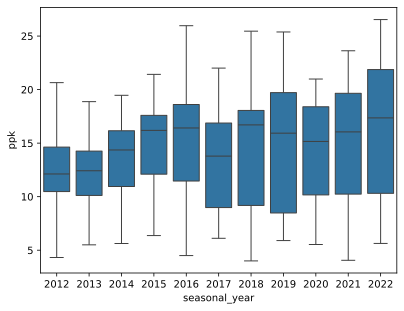

In [6]:
ppk_locality = pd.read_csv("../data/derived/ppk_locality.csv", low_memory=False)

sns.boxplot(data=ppk_locality, x="seasonal_year", y="ppk", legend=False)

In [10]:
(
    ppk_locality.set_index("sellers_locality")
    .groupby("seasonal_year")
    .ppk.idxmax()
    .rename("Locality with the maximum PPK")
)

seasonal_year
2012        Kapisillit
2013          Qeqertaq
2014          Oqaatsut
2015           Naajaat
2016           Saarloq
2017    Kitsissuarsuit
2018    Kitsissuarsuit
2019         Kangerluk
2020         Niaqornat
2021          Ikerasak
2022        Ukkusissat
Name: Locality with the maximum PPK, dtype: object

In [11]:
(
    ppk_locality.set_index("sellers_locality")
    .groupby("seasonal_year")
    .ppk.idxmin()
    .rename("Locality with the minimum PPK")
)

seasonal_year
2012      Sisimiut
2013      Sisimiut
2014      Tasiilaq
2015      Sisimiut
2016       Kulusuk
2017    Kangaamiut
2018    Narsarsuaq
2019      Sisimiut
2020      Sisimiut
2021       Itilleq
2022      Sisimiut
Name: Locality with the minimum PPK, dtype: object

## Total Daily Catch During Fishing Seasons 2012-2022


<Axes: xlabel='seasonal_day', ylabel='cumulative'>

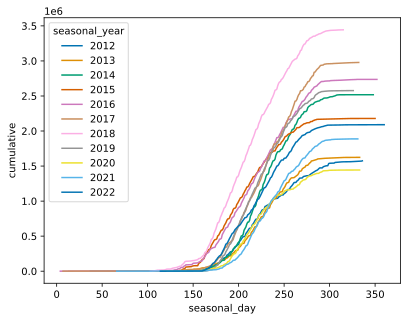

In [13]:
total_daily_catch = pd.read_csv("../data/derived/total_daily_catch.csv")
sns.lineplot(
    total_daily_catch,
    x="seasonal_day",
    y="cumulative",
    hue="seasonal_year",
    palette="colorblind",
)

### Correlation Tests (Season Start, End, and Length ~ Fishing Season)


In [28]:
total_first_catch = pd.read_csv("../data/derived/total_first_catch.csv")
total_first_catch.corr(method="kendall").loc["first_catch_day", "season"]

0.3090909090909091

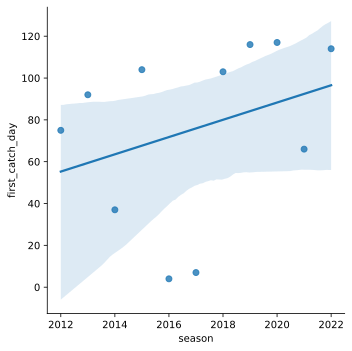

In [16]:
sns.lmplot(data=total_first_catch, x="season", y="first_catch_day", legend=False)

In [30]:
total_last_catch = pd.read_csv("../data/derived/total_last_catch.csv")
total_last_catch.corr(method="kendall").loc["last_catch_day", "season"]

-0.07339758434175737

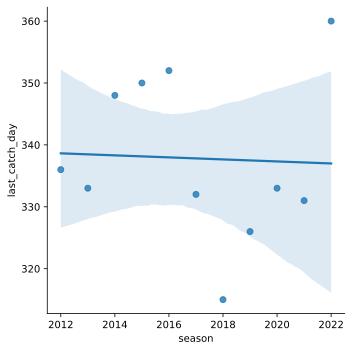

In [31]:
sns.lmplot(data=total_last_catch, x="season", y="last_catch_day", legend=False)

In [32]:
total_ice_season_length = pd.read_csv("../data/derived/total_ice_season_length.csv")
total_ice_season_length.corr(method="kendall").loc["ice_season_length", "season"]

-0.15555555555555553

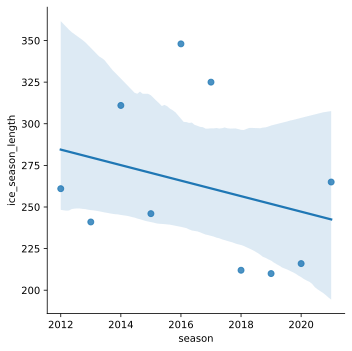

In [33]:
sns.lmplot(
    data=total_ice_season_length, x="season", y="ice_season_length", legend=False
)

### Local First Catch


Text(0, 0.5, 'Day of first ice landing')

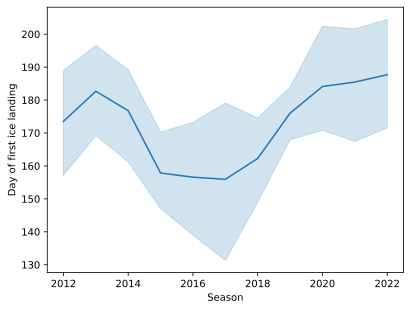

In [46]:
locality_first_catch = pd.read_csv("../data/derived/locality_first_catch.csv")

ax = sns.lineplot(
    data=locality_first_catch.groupby(by=["season", "sellers_locality"])
    .first_catch_day.min()
    .reset_index(),
    x="season",
    y="first_catch_day",
    legend=False,
)
ax.set_xlabel("Season")
ax.set_ylabel("Day of first ice landing")

### Local Last Catch


Text(0, 0.5, 'Day of last ice landing')

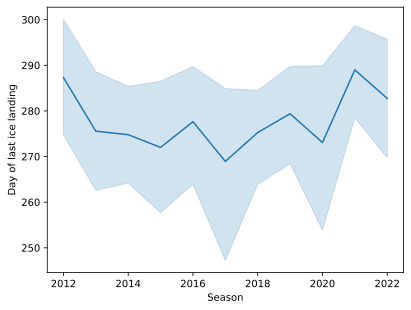

In [50]:
locality_last_catch = pd.read_csv("../data/derived/locality_last_catch.csv")

ax = sns.lineplot(
    data=locality_last_catch.groupby(by=["season", "sellers_locality"])
    .last_catch_day.max()
    .reset_index(),
    x="season",
    y="last_catch_day",
    legend=False,
)
ax.set_xlabel("Season")
ax.set_ylabel("Day of last ice landing")

### Number of Fields Fished, 2012-2022


<Axes: xlabel='season', ylabel='n_fields'>

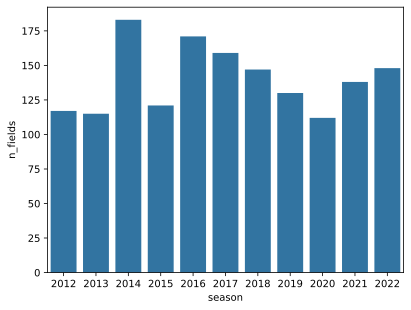

In [52]:
num_fields = pd.read_csv("../data/derived/total_num_fields.csv")
sns.barplot(data=num_fields, x="season", y="n_fields")

### Local Number of Fields fished, 2012-2022

#todo create visualization of this, and stats test


In [91]:
localities = pd.read_csv("../resources/localities.csv")
localities = localities[["locality", "geo_lat"]]

<Axes: ylabel='locality'>

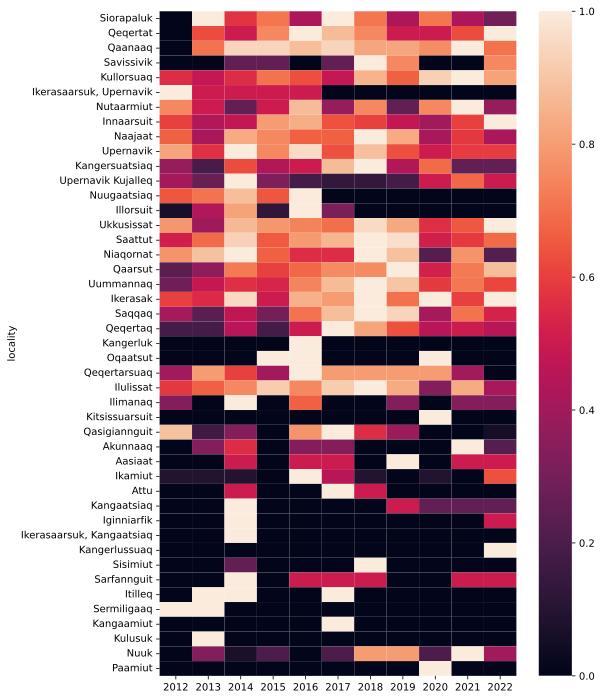

In [102]:
locality_num_fields = pd.read_csv("../data/derived/locality_num_fields.csv")
locality_num_fields = locality_num_fields.pivot(
    index="sellers_locality", columns="seasonal_year", values="n_fields"
).fillna(0)

# Normalize each locality to maximum number of field codes
locality_num_fields = locality_num_fields.div(
    locality_num_fields.max(axis="columns"), axis=0
)

locality_num_fields = (
    locality_num_fields.merge(right=localities, left_index=True, right_on="locality")
    .set_index("locality")
    .sort_values(by="geo_lat", ascending=False)
    .drop(columns="geo_lat")
)
plt.figure(figsize=(8, 12))
sns.heatmap(locality_num_fields)

### Fishing Grounds
